In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from DENCLUE import DENCLUE
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('iris-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.390160,0.434679,-0.578623,-0.569232
1,-0.518512,-0.057373,-0.608179,-0.598308
2,-0.578457,0.136859,-0.584726,-0.552043
3,-0.631489,0.042163,-0.540152,-0.554689
4,-0.414170,0.499298,-0.542513,-0.533708


In [5]:
data_array = df_normalized.values
data_list = data_array.tolist()
X = data_list
x = data_array 

In [6]:
X = df_normalized.values  # Convert DataFrame to numpy array

# Instantiate and fit the DENCLUE model
denclue = DENCLUE(h = 0.17, eps = 1e-8, min_density = 1.0)
denclue.fit(X)

DENCLUE(h=0.17, min_density=1.0)

In [7]:
labels = denclue.labels_

print(set(labels))
print(labels)

{0.0, 1.0, 2.0, -1.0}
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  1.  2.  1.
  2.  1.  2.  1.  1.  2.  1.  2.  1.  2. -1.  1.  1.  1.  2.  1.  2.  2.
  2.  2.  2.  2.  2.  1.  1.  1.  1.  2. -1.  2.  2.  1. -1.  1.  1.  2.
  1.  1.  1. -1.  1.  2.  1.  1.  2.  2.  2.  2.  2.  2.  1.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.]


In [8]:
# Calculate metrics
ch_index = calinski_harabasz_score(data_list, labels)
silhouette_avg = silhouette_score(x, labels)
db_index = davies_bouldin_score(x, labels)

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.524560058547412
Calinski Harabasz Score: 199.9778388490444
Davies Bouldin Index: 0.644999763457645


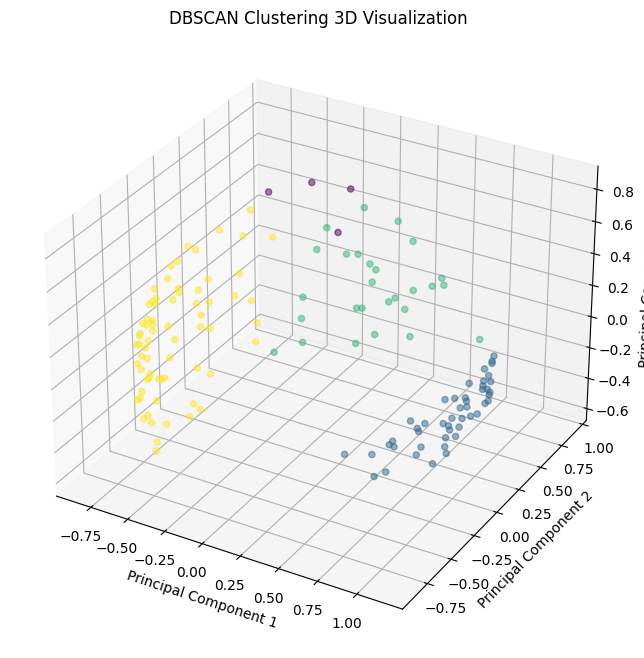

In [9]:
visualization(x, labels)

In [10]:
interactive_visualization(x, labels)